## Exercise 5

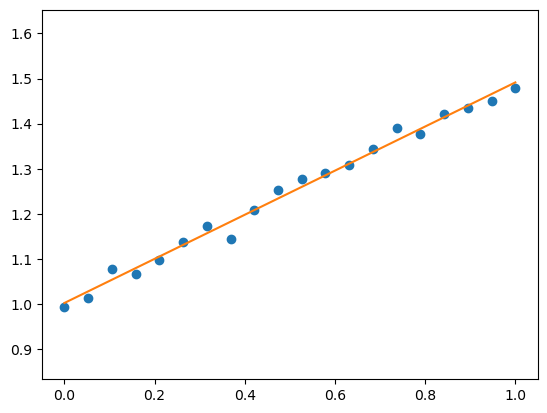

[0.48914923] [1.00230173]


In [1]:
import numpy as np
def LinearRegression(x,y):
    # Computes linear regression parameters
    # alpha and beta corresponding to 
    # the model y = alpha x + beta,
    # from a set of input values (x_i,y_i). 
    n = len(x)
    sx2 = np.sum(x**2)
    sxy = np.sum(x*y)
    sx = np.sum(x)
    sy = np.sum(y)
    M = np.array([[sx2,sx],[sx, n]])
    b = np.array([[sxy],[sy]])
    sol = np.linalg.inv(M) @ b
    alpha,  beta = sol[0],  sol[1]
    return alpha,  beta

# We test this linear regression function:

# dataset
n = 20
x = np.linspace(0,1,n)
y = 0.5 * x + 1 + 0.02*np.random.randn(n)

# linear regression
alpha,  beta = LinearRegression(x,y)

# plotting the results
import matplotlib.pyplot as plt
plt.plot(x,y,"o")
plt.plot(x,alpha*x+beta)
plt.axis("equal")
plt.show()

# alpha and beta should be close to 0.5 and 1
print(alpha,  beta)

## Exercise 6

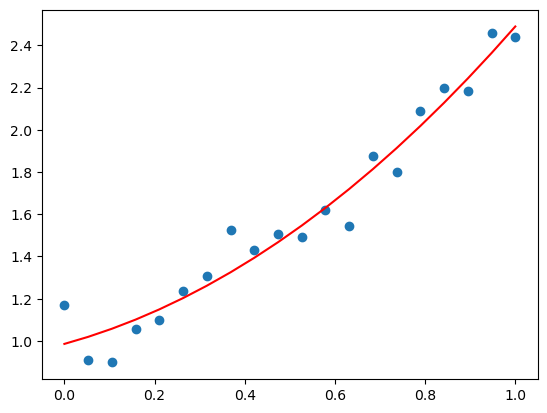

[0.98602014 0.58636301 0.89893141 0.01767248]


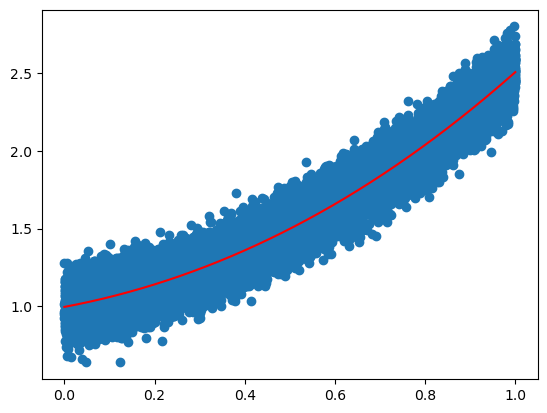

[0.99576186 0.54579312 0.87254289 0.09239127]


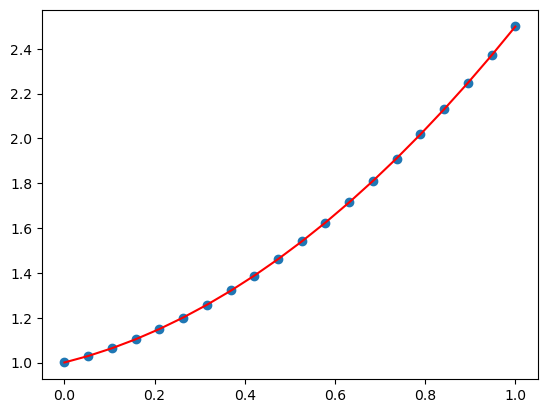

[ 1.00033525  0.49559295  1.01191882 -0.00840132]


In [6]:
import numpy as np
def PolynomialRegression(x,  y,  k):
    # Computes polynomial regression parameters
    # beta_0, beta_1, ..., beta_k corresponding to 
    # the model y = beta_0 + beta_1 x + ... + beta_k x^k,
    # from a set of input values (x_i,y_i). 
    n = len(x)
    M = np.zeros((n,k+1))
    for j in range(k+1):
        M[:,j] = x**j;
    beta = np.linalg.solve(M.T@M,  M.T@y.T)
    return beta
    
# We test the polynomial regression function:

# dataset
n = 20
x = np.linspace(0,1,n)
y = 1 + 0.5*x + x**2 + 0.1*np.random.randn(n)

# apply polynomial regression
k = 3
beta = PolynomialRegression(x, y,  k)

# plotting the results
import matplotlib.pyplot as plt
plt.plot(x, y,  "o")
z = 0
for j in range(k+1):
    z = z + beta[j] * x**j
plt.plot(x,  z,  "r")
plt.show()

# Let's look at the estimated coefficients beta_j.
# The true model is y = 1 + x/2 + x^2, so the ideal
# coefficients should be 1, 0.5, 1, 0, but there are 
# few samples and some noise, so the estimated coeffs
# might not match at all:
print(beta)

# If we redo the same experiment with much more values
# or less noise, coefficients should match:

# - with more values:
n = 20000
x = np.linspace(0,1,n)
y = 1 + 0.5*x + x**2 + 0.1*np.random.randn(n)
k = 3
beta = PolynomialRegression(x,  y,  k)
plt.plot(x, y,  "o")
z = 0
for j in range(k+1):
    z = z + beta[j] * x**j
plt.plot(x,  z,  "r")
plt.show()

print(beta) # should be close to [1, 0.5, 1, 0]

# - with less noise:
n = 20
x = np.linspace(0,1,n)
y = 1 + 0.5*x + x**2 + 0.001*np.random.randn(n)
k = 3
beta = PolynomialRegression(x,  y,  k)
plt.plot(x, y,  "o")
z = 0
for j in range(k+1):
    z = z + beta[j] * x**j
plt.plot(x,  z,  "r")
plt.show()

print(beta) # should be close to [1, 0.5, 1, 0]